In [58]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

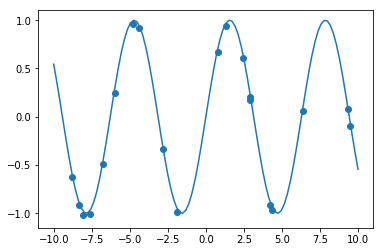

In [11]:
x = np.linspace(-10,10,100)
y = np.sin(x)
plt.plot(x,y)

x_train = 20*np.random.rand(20) -10
y_train = np.sin(x_train) + 0.1*np.random.randn(1)
plt.scatter(x_train,y_train)

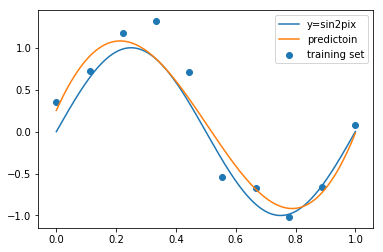

In [53]:
from sklearn import svm

np.random.seed(0)

x = np.linspace(0,1,10)
y = np.sin(2*np.pi*x) + np.random.normal(0, 0.2, x.size)
x = x.reshape(-1,1)

x_true = np.linspace(0,1,500)
y_true = np.sin(2*np.pi*x_true)
x_true = x_true.reshape(-1,1)

model = svm.SVR(kernel='rbf', C=1e3 , gamma=0.6)
fitted = model.fit(x,y)

plt.scatter(x, y, label='training set')
plt.plot(x_true, y_true, label='y=sin2pix')
plt.plot(x_true, model.predict(x_true), label='predictoin')
plt.legend()

# サポートベクター回帰のクロスバリデーション

1.9800000000000009 34.90000000000003 0.3926183325298206


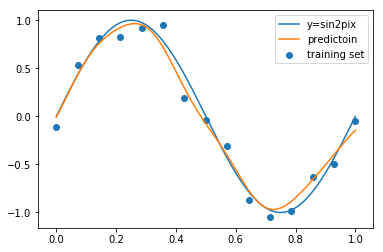

In [111]:
from sklearn import svm

np.random.seed(123)


n = 15
x = np.linspace(0,1,n)
y = np.sin(2*np.pi*x) + 0.5*np.random.normal(0, 0.2, x.size)
x = x.reshape(-1,1)

x_true = np.linspace(0,1,500)
y_true = np.sin(2*np.pi*x_true)
x_true = x_true.reshape(-1,1)


parm_list = [ 0.5 ,0.9,0.991,1.0,1.01,1.1,1.5, 10,12]
C_best = 0
gamma_best = 0
score_best = 1000000

for C in np.arange(1,2,0.01):
    for gamma in np.arange(33,35,0.1):
        model = svm.SVR(kernel='rbf', C=C , gamma=gamma)
        fitted = model.fit(x,y)
        nijo = (model.predict(x_true) - y_true)**2
        score = nijo.sum()
        if score < score_best:
            score_best = score
            C_best = C
            gamma_best = gamma
        

RMSE = (score_best/n)**0.5
print(C_best, gamma_best, RMSE)
model_best = svm.SVR(kernel='rbf', C=C_best , gamma=gamma_best)
fitted_best = model_best.fit(x,y)


plt.scatter(x, y, label='training set')
plt.plot(x_true, y_true, label='y=sin2pix')
plt.plot(x_true, model_best.predict(x_true), label='predictoin')
plt.legend()

In [125]:
list = []
for i in range(100):
    list.append(np.random.normal(0,1,1))